In [2]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

# Cell 2: Load Data
data_path = Path("../data/raw/complaints.csv")
df = pd.read_csv(data_path)
df.head()

C:\Users\zeyed\AppData\Local\Temp\ipykernel_12976\1479089146.py:10: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
# Cell 3: Basic Overview
df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921


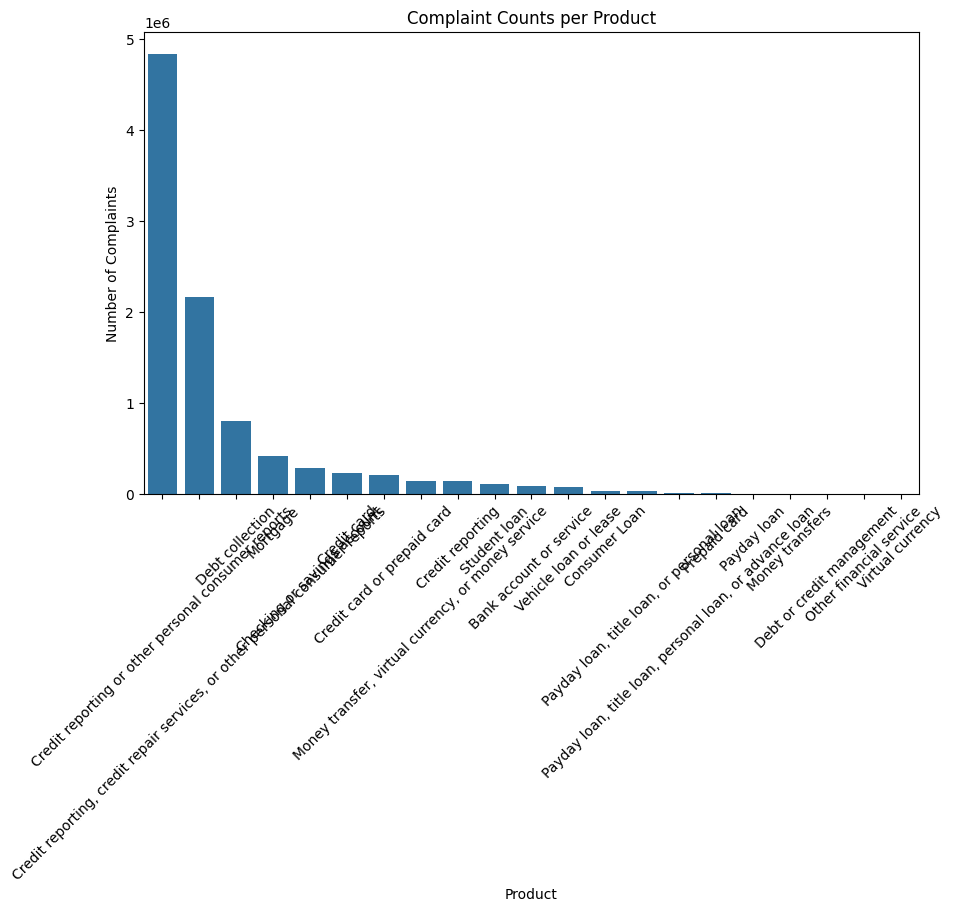

In [4]:
# Cell 4: Distribution by Product
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=45)
plt.title("Complaint Counts per Product")
plt.ylabel("Number of Complaints")
plt.show()

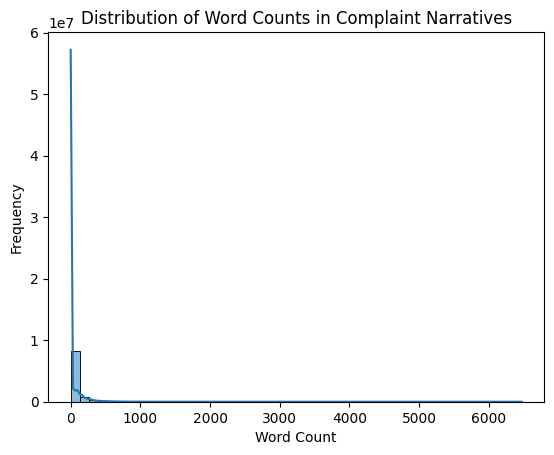

In [5]:
# Cell 5: Word Count of Narratives
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title("Distribution of Word Counts in Complaint Narratives")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [6]:
# Cell 6: Count Narratives Present vs Missing
has_narrative = df['Consumer complaint narrative'].notnull().sum()
no_narrative = df['Consumer complaint narrative'].isnull().sum()
print(f"With narratives: {has_narrative}, Without: {no_narrative}")

With narratives: 2980756, Without: 6629041


In [7]:
# Cell 7: Filter to Required Products
TARGET_PRODUCTS = [
    "Credit card", "Personal loan", "Buy Now, Pay Later (BNPL)",
    "Savings account", "Money transfer"
]

df_filtered = df[
    (df['Product'].isin(TARGET_PRODUCTS)) &
    (df['Consumer complaint narrative'].notnull())
].copy()

print(f"Filtered complaints: {len(df_filtered)}")

Filtered complaints: 80667


In [8]:
# Cell 8: Clean Narratives
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)
df_filtered[['Product', 'cleaned_narrative']].sample(3)

,Product,cleaned_narrative
1079966,Credit card,on xx xx year i applied for the capital one xx...
6322533,Credit card,per the fcra as a federally protected consumer...
9048759,Credit card,i affirm that the inclusion of incorrectly rep...


In [10]:
# Cell 9: Save Filtered Data
output_path = Path("../data/processed/filtered_complaints.csv")
df_filtered.to_csv(output_path, index=False)
print(f"Saved cleaned data to {output_path}")

Saved cleaned data to ..\data\processed\filtered_complaints.csv
